In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from urllib import request
parcialitos_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt"
f = request.urlopen(parcialitos_url)

parcialitos = np.loadtxt(f, dtype=float, delimiter=",")
#parcialitos
x = np.delete(parcialitos, 2, 1)
y = np.delete(parcialitos, [0, 1], 1)

In [ ]:
mean = x.mean(axis = 0)
desvio = x.std(axis = 0)

x_normalizado = (x - mean)/desvio

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=x_normalizado, y=y, batch_size = len(x), epochs=10000,callbacks=[es])

Epoch 1/10000
1/1 [==============================] - 4s 4s/step - loss: 0.5282 - accuracy: 0.6400
Epoch 2/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3036 - accuracy: 0.8600
Epoch 3/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2719 - accuracy: 0.8600
Epoch 4/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2555 - accuracy: 0.8600
Epoch 5/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2450 - accuracy: 0.8700
Epoch 6/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2377 - accuracy: 0.8700
Epoch 7/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2323 - accuracy: 0.8700
Epoch 8/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2281 - accuracy: 0.8800
Epoch 9/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2247 - accuracy: 0.8800
Epoch 10/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2220 - accuracy: 0.8900
Epoch 1

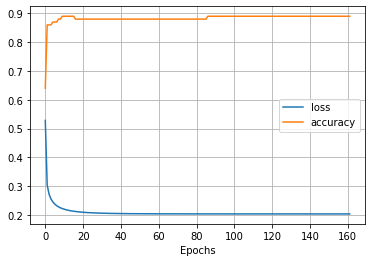

In [ ]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.show()

In [ ]:
x_predict = np.array([63, 55])

mean_p = x_predict.mean(axis = 0)
desvio_p = x_predict.std(axis = 0)
x_p_normalizado = ((x_predict - mean_p)/desvio_p).reshape([1, 2])

y_predicted = model.predict(x_p_normalizado)
y_predicted #es mayor a 0 entonces aprueba

array([[1.9810959]], dtype=float32)

In [ ]:
x_pos = np.array([x_normalizado[i] for i in range(len(x)) if y[i] == 1]) 
x_neg = np.array([x_normalizado[i] for i in range(len(x)) if y[i] == 0]) 

In [ ]:
parametros = model.get_weights()
w1 = parametros[0][0]
w2 = parametros[0][1]
b = parametros[1]
x1 = np.delete(x_normalizado, 1, 1)

# armo la recta
# w1*x1 + w2*x2 + b = 0 --> x2 = (-w1*x1 - b)/w2
x2 = (-w1*x1 - b)/w2
print(x2)
#print(model.predict(x))

[[ 1.2562768 ]
 [ 1.49640221]
 [ 1.18852105]
 [-0.1588542 ]
 [-1.2025365 ]
 [ 0.67715538]
 [-0.21001725]
 [-0.98062465]
 [-1.04009147]
 [-1.50152489]
 [-2.13430377]
 [-0.98001078]
 [-1.3838268 ]
 [-0.66723671]
 [ 0.98416398]
 [ 0.18506277]
 [-0.65093408]
 [-0.58874056]
 [-0.73904379]
 [-1.08881458]
 [-0.55691386]
 [-1.79186887]
 [ 0.37531962]
 [ 1.27906593]
 [-1.14115377]
 [-0.27448419]
 [-1.26662115]
 [-1.98220043]
 [-0.25007783]
 [ 1.02582987]
 [-0.22511177]
 [-1.55532532]
 [ 0.28821617]
 [ 0.29168078]
 [ 0.94548685]
 [ 0.14829588]
 [ 1.29548573]
 [-0.380013  ]
 [-0.96758604]
 [ 1.28063953]
 [-1.47215658]
 [ 0.31923625]
 [-2.05578248]
 [-1.38724299]
 [ 0.34691819]
 [-0.27180785]
 [-1.1006771 ]
 [-2.24005788]
 [-0.26352423]
 [-1.89641345]
 [-1.25303606]
 [-2.32316028]
 [-1.84003506]
 [ 1.26176624]
 [ 0.3890669 ]
 [ 0.42781403]
 [-2.23308351]
 [ 1.36958386]
 [-0.93765658]
 [-0.80188311]
 [-1.00115851]
 [ 1.21959852]
 [ 0.05867208]
 [ 1.50901979]
 [ 0.70013371]
 [-0.51200356]
 [ 0.93326

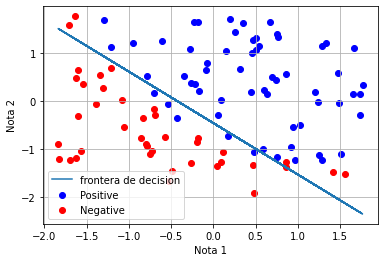

In [ ]:
plt.plot(x1, x2, label = 'frontera de decision')
plt.scatter(np.delete(x_pos, 1, 1), np.delete(x_pos, 0, 1), color = 'blue', label = 'Positive') 
plt.scatter(np.delete(x_neg, 1, 1), np.delete(x_neg, 0, 1), color = 'red', label = 'Negative')
plt.grid()
plt.xlabel('Nota 1')
plt.ylabel('Nota 2')
plt.legend()
plt.show()

##**Glass**

In [98]:
glass_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(glass_url)
glass = pd.read_csv(f)
glass.shape
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


####Curado de datos

In [100]:
glass.Type.replace({1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5}, inplace=True)

###Creacion de modelo y entrenamiento

In [101]:
glass.values.shape

(214, 10)

In [102]:
array = glass.values
y = np.delete(array, [0,1,2,3,4,5,6,7,8], 1)
x = np.delete(array, [9], 1)
x.shape

(214, 9)

In [113]:
def normalizar(x):
  mean = x.mean(axis = 0)
  desvio = x.std(axis = 0)
  return (x - mean)/desvio

x_normalizado = normalizar(x)

In [ ]:
x_normalizado

In [114]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6, input_dim=9))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 60        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [115]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=2),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=x_normalizado, y=y, batch_size = len(x), epochs=1000,callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 0s 292ms/step - loss: 2.0198 - accuracy: 0.0327
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8955 - accuracy: 0.7757
Epoch 3/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.7178 - accuracy: 0.8037
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6525 - accuracy: 0.8224
Epoch 5/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.6119 - accuracy: 0.8224
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5836 - accuracy: 0.8271
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5629 - accuracy: 0.8318
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5469 - accuracy: 0.8318
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5339 - accuracy: 0.8318
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.5230 - accuracy: 0.8364
Epoch 11/1

In [116]:
x_test = np.array([1.52, 13, 3.5, 1.2, 73, 0.6, 9, 0.1, 0.2]).reshape([1,9])

def clasificar_vidrios(x_test):
  z = model.predict(x_test)
  y_hat = np.argmax(z)

  if y_hat == 0:
    print("Glass type: 'Building windows float processed'")
  elif y_hat == 1:
    print("Glass type: 'Building windows non float processed'")
  elif y_hat == 2:
    print("Glass type: 'Vehicle windows float processed'")
  elif y_hat == 3:
    print("Glass type: 'Containers'")
  elif y_hat == 4:
    print("Glass type: 'Tableware'")
  elif y_hat == 5:
    print("Glass type: 'Headlamps'")


In [117]:
clasificar_vidrios(x_test)

Glass type: 'Containers'


**Confusion Matrix: Glass**

ValueError: ignored

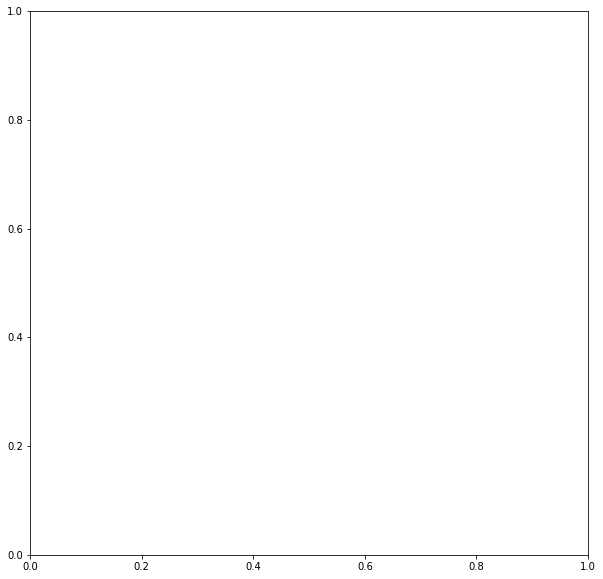

In [119]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["0", "1", "2", "3", "4", "5"],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))


clf = DummyClassifier(strategy="most_frequent")
clf.fit(x_normalizado, y)
y_test_pred = clf.predict(x_normalizado)
#print("Baseline model:")
show_results(y, model.predict(x_normalizado))

###**Prostata**

In [90]:
prostata_data_url="https://raw.githubusercontent.com/rplatini/CURSO-LEARNING1/main/datasets/prostata_data.csv"
f = request.urlopen(prostata_data_url)
prostata_data = pd.read_csv(f)
print(prostata_data.shape)
#prostata_data

(619, 763)


In [91]:
prostata_label_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
f = request.urlopen(prostata_label_url)
prostata_label = pd.read_csv(f)
print(prostata_label.shape)
#prostata_label

(619, 2)


In [92]:
prostata_label['class'].replace({'healthy': 0, 'cancer': 1, 'post-surgery': 2, 'benign': 3}, inplace=True)
labels = prostata_label.drop(columns = ['Unnamed: 0'])

#agrego las labels a la ultima fila de los datos
prostata_data.insert(763, 'class', labels, allow_duplicates=False)
prostata_data = prostata_data.dropna(subset = ['class'])
labels = labels.dropna()

In [93]:
#normalizo los datos
x_data = prostata_data.drop(columns = ['Unnamed: 0', 'class'])
x = x_data.values.astype('float')
x_normalizado = normalizar(x)
print(x_normalizado.shape)
print(labels.shape)

(390, 762)
(390, 1)


In [94]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=762))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 3052      
                                                                 
Total params: 3,052
Trainable params: 3,052
Non-trainable params: 0
_________________________________________________________________


In [95]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.04),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=x_normalizado, y=labels, batch_size = len(x_normalizado), epochs=2000,callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 1s 663ms/step - loss: 2.2531 - accuracy: 0.2590
Epoch 2/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.2924 - accuracy: 0.6538
Epoch 3/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.0128 - accuracy: 0.6282
Epoch 4/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.9664 - accuracy: 0.6538
Epoch 5/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.9300 - accuracy: 0.6615
Epoch 6/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.9002 - accuracy: 0.6590
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.8746 - accuracy: 0.6718
Epoch 8/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.8517 - accuracy: 0.6692
Epoch 9/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.8310 - accuracy: 0.6923
Epoch 10/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.8121 - accuracy: 0.6974
Epoch 11

**Confusion Matrix: prostata**

Baseline model:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       146
         1.0       0.38      1.00      0.55       147
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        63

    accuracy                           0.38       390
   macro avg       0.09      0.25      0.14       390
weighted avg       0.14      0.38      0.21       390



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


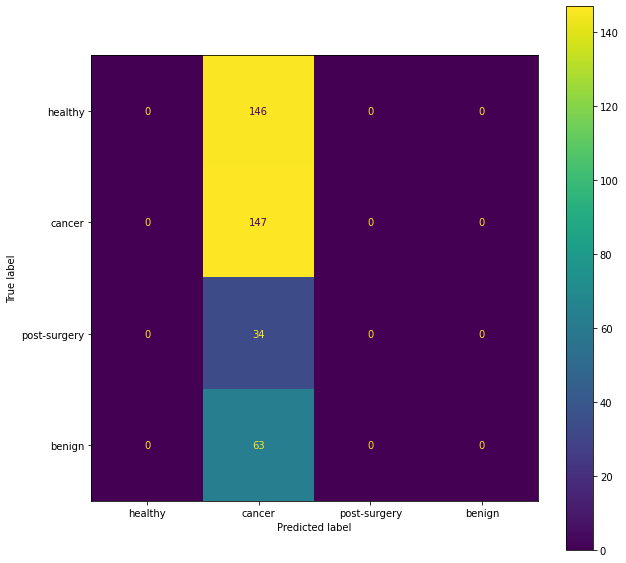

In [96]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def show_results(y_true,y_pred):
    # Plot confusion matrix
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["healthy", "cancer", "post-surgery", "benign"],ax=ax)

    # Show Classification report
    print(classification_report(y_true,y_pred))


clf = DummyClassifier(strategy="most_frequent")
clf.fit(x_normalizado, labels)
y_test_pred = clf.predict(x_normalizado)
print("Baseline model:")
show_results(labels, y_test_pred)

####**MNIST**

In [120]:
mnist = tf.keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

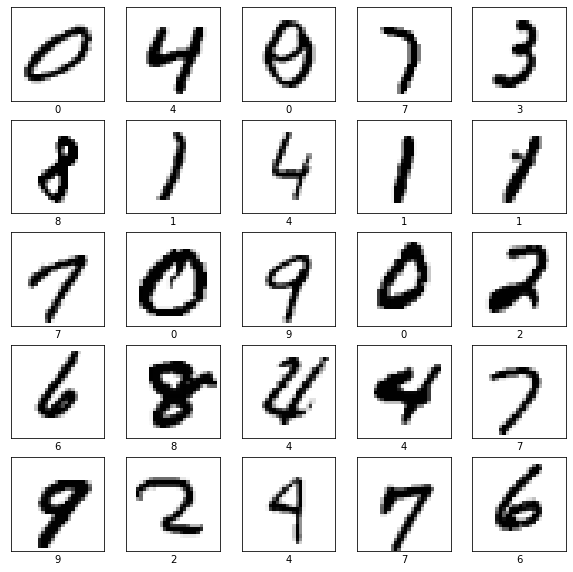

In [121]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

In [122]:
#normalizo
def normalizar_para_imagenes(x):
  mean = x.mean(axis = 0)
  desvio = x.std(axis = 0)
  desvio[desvio == 0] = 1
  x = (x - mean)/desvio
  return x

train_images = normalizar_para_imagenes(train_images)
#print(train_images)

In [123]:
train_images = train_images.reshape((train_images.shape[0], 28*28)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 28*28)).astype('float32')
print(train_images.shape)
print(train_labels.shape)

(60000, 784)
(60000,)


In [124]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=784))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [125]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=2),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=train_images, y=train_labels, batch_size = len(train_images), epochs=1000,callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 1s 661ms/step - loss: 3.2055 - accuracy: 0.0617
Epoch 2/1000
1/1 [==============================] - 0s 224ms/step - loss: 2.1046 - accuracy: 0.7100
Epoch 3/1000
1/1 [==============================] - 0s 239ms/step - loss: 0.9096 - accuracy: 0.8273
Epoch 4/1000
1/1 [==============================] - 0s 255ms/step - loss: 0.7118 - accuracy: 0.8532
Epoch 5/1000
1/1 [==============================] - 0s 241ms/step - loss: 0.6105 - accuracy: 0.8682
Epoch 6/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.5481 - accuracy: 0.8758
Epoch 7/1000
1/1 [==============================] - 0s 240ms/step - loss: 0.5055 - accuracy: 0.8819
Epoch 8/1000
1/1 [==============================] - 0s 238ms/step - loss: 0.4707 - accuracy: 0.8875
Epoch 9/1000
1/1 [==============================] - 0s 246ms/step - loss: 0.4474 - accuracy: 0.8898
Epoch 10/1000
1/1 [==============================] - 0s 235ms/step - loss: 0.4251 - accuracy: 0.8930

In [126]:
#clasifico
#clasifico
test_images = normalizar_para_imagenes(test_images)
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)
print(predicted_labels)
print(test_labels)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


**Confusion Matrix: mnist**

Baseline model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


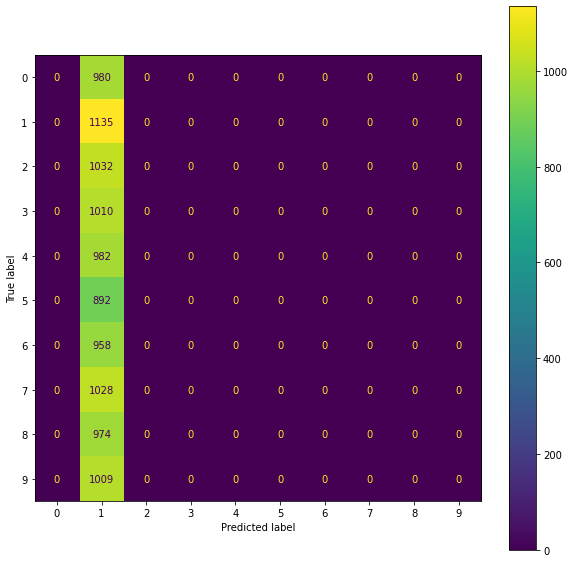

In [129]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def show_results(y_true,y_pred):
    # Plot confusion matrix
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],ax=ax)

    # Show Classification report
    print(classification_report(y_true,y_pred))


clf = DummyClassifier(strategy="most_frequent")
clf.fit(test_images, test_labels)
y_test_pred = clf.predict(test_images)
print("Baseline model:")
show_results(test_labels, y_test_pred)

 **FASHION MNIST**

In [130]:
f_mnist = tf.keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


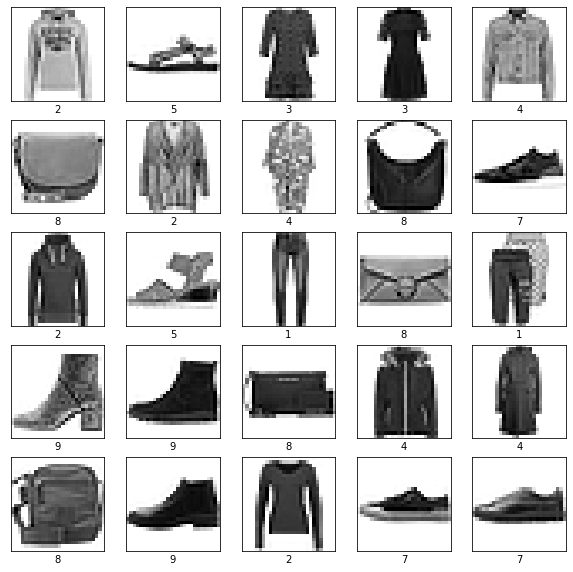

In [131]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

In [132]:
train_images.shape

(60000, 28, 28)

In [133]:
train_images = normalizar_para_imagenes(train_images)
print(train_images)

[[[-0.00864371 -0.02322333 -0.03917806 ... -0.05051678 -0.0332743
   -0.01362235]
  [-0.01257211 -0.0178614  -0.03304933 ... -0.09005845 -0.05847776
   -0.02894636]
  [-0.01552501 -0.02550164 -0.04603359 ... -0.12987352 -0.08776806
   -0.05104194]
  ...
  [-0.10000649 -0.16163528 -0.23385237 ... -0.29742739 -0.20892432
   -0.11137299]
  [-0.05617561 -0.10437285 -0.17772606 ... -0.24255913 -0.1551864
   -0.07603711]
  [-0.02515919 -0.04823348 -0.10154972 ... -0.15681128 -0.08967308
   -0.03414729]]

 [[-0.00864371 -0.02322333 -0.03917806 ... -0.05051678 -0.0332743
   -0.01362235]
  [-0.01257211 -0.0178614  -0.03304933 ... -0.09005845 -0.05847776
   -0.02894636]
  [-0.01552501 -0.02550164 -0.04603359 ... -0.12987352 -0.08776806
   -0.05104194]
  ...
  [-0.10000649 -0.16163528 -0.23385237 ... -0.29742739 -0.20892432
   -0.11137299]
  [-0.05617561 -0.10437285 -0.17772606 ... -0.24255913 -0.1551864
   -0.07603711]
  [-0.02515919 -0.04823348 -0.10154972 ... -0.15681128 -0.08967308
   -0.0341

In [134]:
train_images = train_images.reshape((train_images.shape[0], 28*28)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 28*28)).astype('float32')
print(train_images.shape)
print(train_labels.shape)

(60000, 784)
(60000,)


In [135]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=784))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [136]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=train_images, y=train_labels, batch_size = len(train_images), epochs=1000,callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 1s 611ms/step - loss: 3.4564 - accuracy: 0.0697
Epoch 2/1000
1/1 [==============================] - 0s 232ms/step - loss: 1.4430 - accuracy: 0.5075
Epoch 3/1000
1/1 [==============================] - 0s 235ms/step - loss: 1.1639 - accuracy: 0.6024
Epoch 4/1000
1/1 [==============================] - 0s 244ms/step - loss: 1.0280 - accuracy: 0.6473
Epoch 5/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.9549 - accuracy: 0.6690
Epoch 6/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.9017 - accuracy: 0.6891
Epoch 7/1000
1/1 [==============================] - 0s 241ms/step - loss: 0.8598 - accuracy: 0.6998
Epoch 8/1000
1/1 [==============================] - 0s 217ms/step - loss: 0.8255 - accuracy: 0.7167
Epoch 9/1000
1/1 [==============================] - 0s 247ms/step - loss: 0.7960 - accuracy: 0.7232
Epoch 10/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.7715 - accuracy: 0.7371

In [137]:
#clasifico
test_images = normalizar_para_imagenes(test_images)
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)
print(predicted_labels)
print(test_labels)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


Baseline model:
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


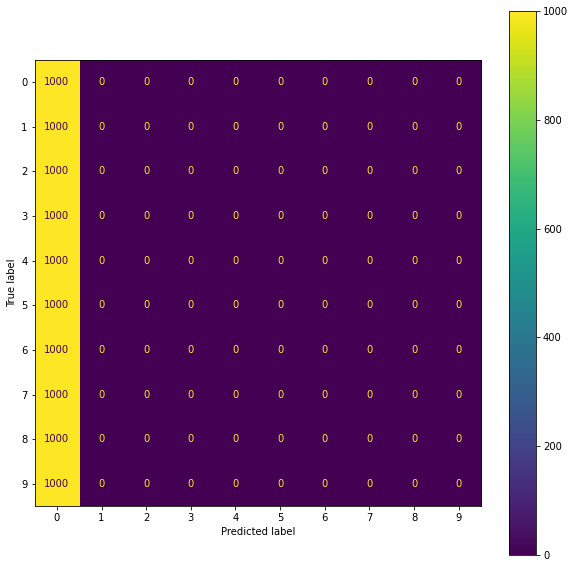

In [138]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def show_results(y_true,y_pred):
    # Plot confusion matrix
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],ax=ax)

    # Show Classification report
    print(classification_report(y_true,y_pred))


clf = DummyClassifier(strategy="most_frequent")
clf.fit(test_images, test_labels)
y_test_pred = clf.predict(test_images)
print("Baseline model:")
show_results(test_labels, y_test_pred)